<a href="https://colab.research.google.com/github/Aravindh020/Randomforest/blob/master/Spam_ham_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import spacy
from spacy import displacy

In [0]:
nlp = spacy.load('en_core_web_sm')


In [0]:
Doc = "Spam message classification using random forest classification algorithm"

In [0]:
doc1 = nlp(Doc)

In [48]:
for token in doc1:
    print(token)

Spam
message
classification
using
random
forest
classification
algorithm


In [49]:
for lem in doc1:
    print(lem.text, lem.lemma_)

Spam spam
message message
classification classification
using use
random random
forest forest
classification classification
algorithm algorithm


In [50]:
for token in doc1:
    print(token.text, token.pos_)

Spam NOUN
message NOUN
classification NOUN
using VERB
random ADJ
forest NOUN
classification NOUN
algorithm NOUN


In [0]:
from spacy.lang.en.stop_words import STOP_WORDS

In [52]:
stopwords = list(STOP_WORDS)
print(stopwords)


len(stopwords)

['own', 'nine', 'last', 'your', 'fifty', 'six', 'give', 'namely', 'still', 'whose', 'per', 'when', '‘d', '‘ll', 'put', 'what', '’ll', 'with', 'himself', 'formerly', 'may', 'former', 'toward', 'five', 'made', 'its', 'though', 'first', 'always', 'something', 'sometime', '’m', 'herein', 'twelve', 'their', 'back', 'becoming', 'ca', 'further', 'take', 'whence', 'since', 'very', 'you', 'off', 'by', 'onto', 'besides', 'mine', 'be', 'perhaps', 'using', '’re', 'doing', 'whereupon', "'ve", 'would', 'twenty', 'hers', 'becomes', 'on', 'except', 'i', 'am', 'nowhere', 'latter', 'although', 'anyhow', 'anywhere', 'might', 'so', 'top', 'various', 'being', 'along', 'nor', 'become', 'for', 'has', 'full', '’ve', '‘ve', 'same', 'whole', 'empty', 'only', 'into', 'over', 'ever', 'here', 'rather', 'other', 'seems', 'third', 'hereby', 'side', 'they', 'due', 'across', 'via', 'wherein', 'or', 'less', 'at', 'hence', 'such', 'forty', 'anyway', 'are', 'much', 'someone', 'everyone', 'from', 'yourselves', 'together',

326

In [53]:
for token in doc1:
    if token.is_stop == False:
        print(token)

Spam
message
classification
random
forest
classification
algorithm


In [54]:
displacy.render(doc1, style = 'dep')
displacy.render(doc1, style = 'ent')

/usr/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


'<div class="entities" style="line-height: 2.5; direction: ltr">Spam message classification using random forest classification algorithm</div>'

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
df = pd.read_csv('spam.tsv', sep='\t')


In [0]:
nlp = spacy.load('en_core_web_sm')

In [58]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [59]:
df['label'].isnull().sum()

0

In [60]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [61]:
ham = df[df['label']=='ham']
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [62]:
spam = df[df['label']=='spam']
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [63]:
ham.shape, spam.shape

((4825, 4), (747, 4))

In [64]:
spam.shape[1]

4

In [0]:
ham = ham.sample(spam.shape[0])

In [66]:
data = ham.append(spam, ignore_index=True)
data.tail()

,label,message,length,punct
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3
1493,spam,This is the 2nd time we have tried 2 contact u...,160,8


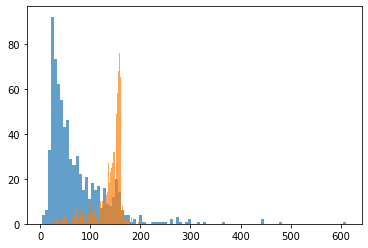

In [67]:
plt.hist(data[data['label']=='ham']['length'], bins = 100, alpha = 0.7)
plt.hist(data[data['label']=='spam']['length'], bins = 100, alpha = 0.7)

plt.show()

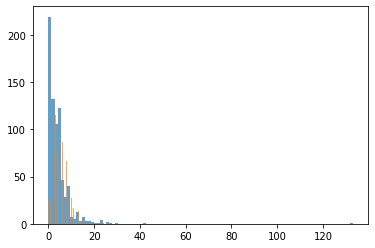

In [68]:
plt.hist(data[data['label']=='ham']['punct'], bins = 100, alpha = 0.7)
plt.hist(data[data['label']=='spam']['punct'], bins = 100, alpha = 0.7)

plt.show()

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [71]:
data.head()

,label,message,length,punct
0,ham,And several to you sir.,23,1
1,ham,make that 3! 4 fucks sake?! x,29,3
2,ham,I've reached home finally...,28,4
3,ham,Nokia phone is lovly..,22,2
4,ham,I just cooked a rather nice salmon a la you,43,0


In [0]:
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size = 0.3, random_state=0, shuffle = True, stratify=data['label'])

In [0]:
vectorizer = TfidfVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)

In [74]:
X_train_vect.shape

(1045, 3700)

In [0]:
clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', RandomForestClassifier(n_estimators=100, n_jobs=-1))])

In [76]:
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

In [0]:
y_pred = clf.predict(X_test)

In [78]:
confusion_matrix(y_test, y_pred)

array([[222,   3],
       [ 26, 198]])

In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.90      0.99      0.94       225
        spam       0.99      0.88      0.93       224

    accuracy                           0.94       449
   macro avg       0.94      0.94      0.94       449
weighted avg       0.94      0.94      0.94       449



In [80]:
accuracy_score(y_test, y_pred)

0.9354120267260579

In [81]:
clf.predict(["SIX chances to win CASH! From 100 to 20,000 pounds"])

array(['spam'], dtype=object)

In [82]:
clf.predict(["I'm gonna be home soon and i don't want to talk about this stuff anymore tonight"])

array(['ham'], dtype=object)